## Installation and setup


In [ ]:
!pip3 install opencv-python matplotlib

## Basic Image Processing

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read the two images (image1.jpg and image2.jpg). What are the sizes of the matrices ?

In [45]:
im1 = cv2.imread("image1.jpg")
im2 = cv2.imread("image2.jpg")

In [46]:
h1, w1, c1 = im1.shape
h2, w2, c2 = im2.shape


In [47]:
print(f"Image1 dimentions {h1} x {w1} channels {c1}")
print(f"Image1 dimentions {h2} x {w2} channels {c2}")

Image1 dimentions 300 x 300 channels 3
Image1 dimentions 300 x 300 channels 3


### The original image pixel values are in integer format. Find the minimum and maximum values. Normalize the pixels to a range of 0 to 1 with double precision format.

In [48]:
min_im1, max_im1 = int(np.min(im1)), int(np.max(im1))
min_im2, max_im2 = int(np.min(im2)), int(np.max(im2))

In [49]:
print(f"Image1 -> minimum value:{min_im1:3}, maximum value: {max_im1:3}")
print(f"Image2 -> minimum value:{min_im2:3}, maximum value: {max_im2:3}")

Image1 -> minimum value:  0, maximum value: 255
Image2 -> minimum value: 16, maximum value: 236


In [50]:
def show_img(title, img):
    img_rgb = img[..., ::-1]
    height, width = img_rgb.shape[:2]
    figsize = (width / 100, height / 100)
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

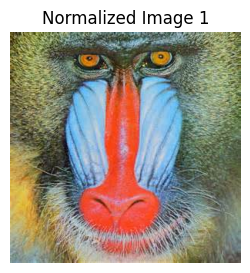

In [51]:
nr_im1 = im1.astype(np.float64) / 255

show_img("Normalized Image 1", nr_im1)

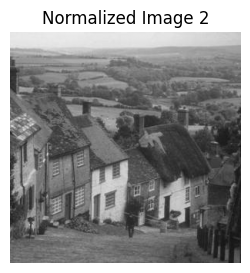

In [52]:
nr_im2 = im2.astype(np.float64) / 255

show_img("Normalized Image 2", nr_im2)

### Add the two images together and renormalize the values.

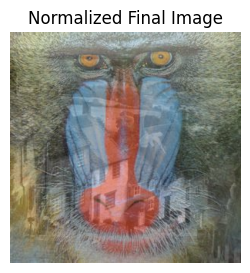

In [53]:
a_img = nr_im2 + nr_im1
nr_final_im = a_img.astype(np.float64) / 2

show_img("Normalized Final Image", nr_final_im)

### Rescale the values to a range of 0 to 255 and save the final image.

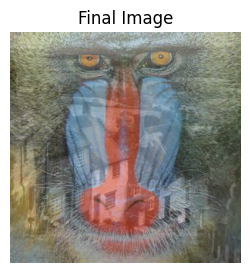

In [54]:
final_im = nr_final_im * 255
final_im = final_im.astype(np.uint8)

show_img("Final Image", final_im)

In [55]:
cv2.imwrite("final.jpg", final_im)

True

### Display only one channel

In [56]:
def one_channel(image, channel):
    dummy = image.copy()
    
    channel_map = {"B": 0, "G": 1, "R": 2}
    
    if channel not in channel_map:
        raise ValueError("Channel must be one of 'B', 'G', or 'R'.")

    idx = channel_map[channel]

    for i in range(3):
        if i != idx:
            dummy[:, :, i] = 0

    show_img(f"Channel {channel}", dummy)


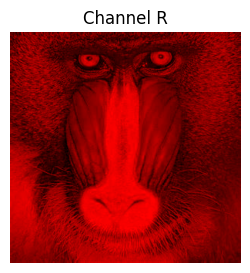

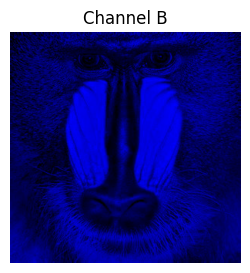

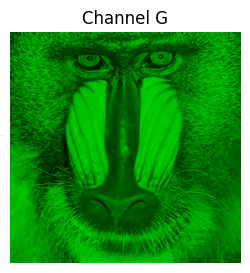

In [59]:
one_channel(im1, "R")
one_channel(im1, "B")
one_channel(im1, "G")